In [33]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

In [34]:
# -------------------------------------------------
# Matplotlib settings for thicker lines & bigger fonts
# -------------------------------------------------
plt.rcParams.update({
    'font.size': 18,          # Default text size
    'axes.labelsize': 18,     # Axis label size
    'axes.titlesize': 20,
    'legend.fontsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'lines.linewidth': 2,     # Thicker lines by default
    'lines.markersize': 9,
    'axes.linewidth': 2,
    'xtick.major.size': 10,
    'xtick.major.width': 2,
    'ytick.major.size': 10,
    'ytick.major.width': 2,
    'xtick.minor.size': 5,
    'xtick.minor.width': 1,
    'ytick.minor.size': 5,
    'ytick.minor.width': 1
})


# Heat Capacity | Superfluid Helium 

Before we can do any analysis, we need to be able to convert between pressure and temperature for Helium 4. 

For this, given measured datapoints from the He4 scale of 1958, we will fit a polynomial and use this as our temperature scale.

$$
T = a_0 + a_1 \log(P) + a_2 \log^2(P) + \dots
$$

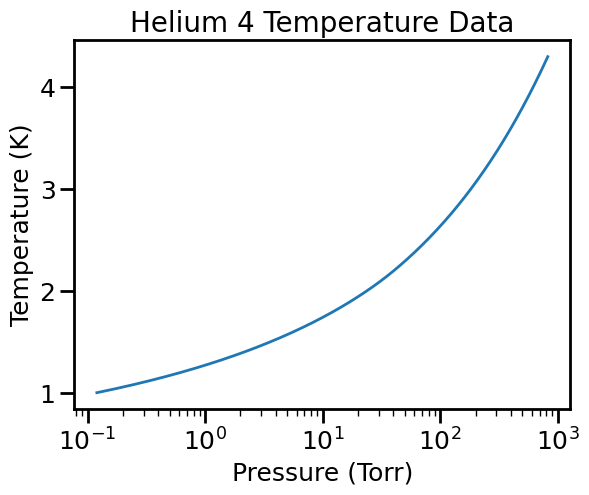

In [65]:
# we load the data from the Wiki (obtained from the 1958 scale)
temperature_scale = np.loadtxt("../Data/helium_temperature_scale.txt")
equilibrium_vapor_pressures = temperature_scale[:,0]/1000 # we divide by 100 to convert to Tors
equilibrium_temperatures = temperature_scale[:,1]


plt.plot(equilibrium_vapor_pressures, equilibrium_temperatures)

plt.xscale('log')

plt.xlabel('Pressure (Torr)')
plt.ylabel('Temperature (K)')
plt.title('Helium 4 Temperature Data')
plt.show()


In [66]:
# we know fit a polynomial like explained above

lnP = np.log(equilibrium_vapor_pressures)
T   = equilibrium_temperatures

degree =5
coeffs = np.polyfit(lnP, T, deg=degree)

# we define a function with the parameters of our model
def helium_T_of_P(P):
    """
    Returns the temperature (K) given a vapor pressure P (Pa),
    based on a polynomial fit in ln(P).
    """
    return np.polyval(coeffs, np.log(P))


# we evaluate the model by computing the RMS error
fit_values = helium_T_of_P(equilibrium_vapor_pressures)
errors = fit_values - T
rms_error = np.sqrt(np.mean(errors**2))

print(f"RMS error: {rms_error:.6f} K")

RMS error: 0.001111 K


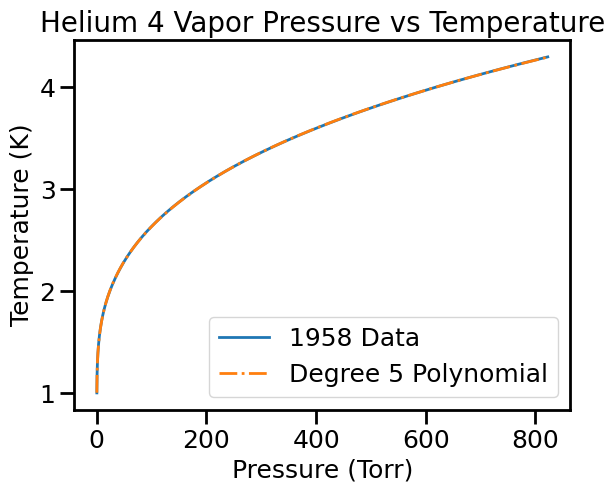

In [67]:
# compare the model to the data for a visual check
plt.figure()
plt.plot(equilibrium_vapor_pressures, equilibrium_temperatures, '-', label='1958 Data')

plt.plot(equilibrium_vapor_pressures, fit_values, '-.', label='Degree 5 Polynomial')

plt.xlabel('Pressure (Torr)')
plt.ylabel('Temperature (K)')
plt.legend()
plt.title('Helium 4 Vapor Pressure vs Temperature')
plt.show()

Beautiful. Now we can proceed with the analysis

## Calibrating the Germanium thermometer

In [68]:
df = pd.read_excel('../Data/HeatCapacity/compiledHeatCapacityData.xlsx', sheet_name='Sheet2')
print(df.head())

   Pressure (mTorr)  Voltage (mV)
0             775.0         0.629
1             770.0         0.632
2             760.0         0.636
3             750.0         0.640
4             745.0         0.645


In [69]:
temperature_scale = np.loadtxt("../Data/helium_temperature_scale.txt")
equilibrium_vapor_pressures = temperature_scale[:,0]
equilibrium_temperatures = temperature_scale[:,1]


def get_approximate_temperature(vapor_pressure):

    ind = np.abs(equilibrium_vapor_pressures - vapor_pressure*1000).argmin()

    return equilibrium_temperatures[ind]

In [70]:
get_approximate_temperature(775)

np.float64(4.24)

In [71]:
temperature_scale = [get_approximate_temperature(p) for p in df['Pressure (mTorr)']]

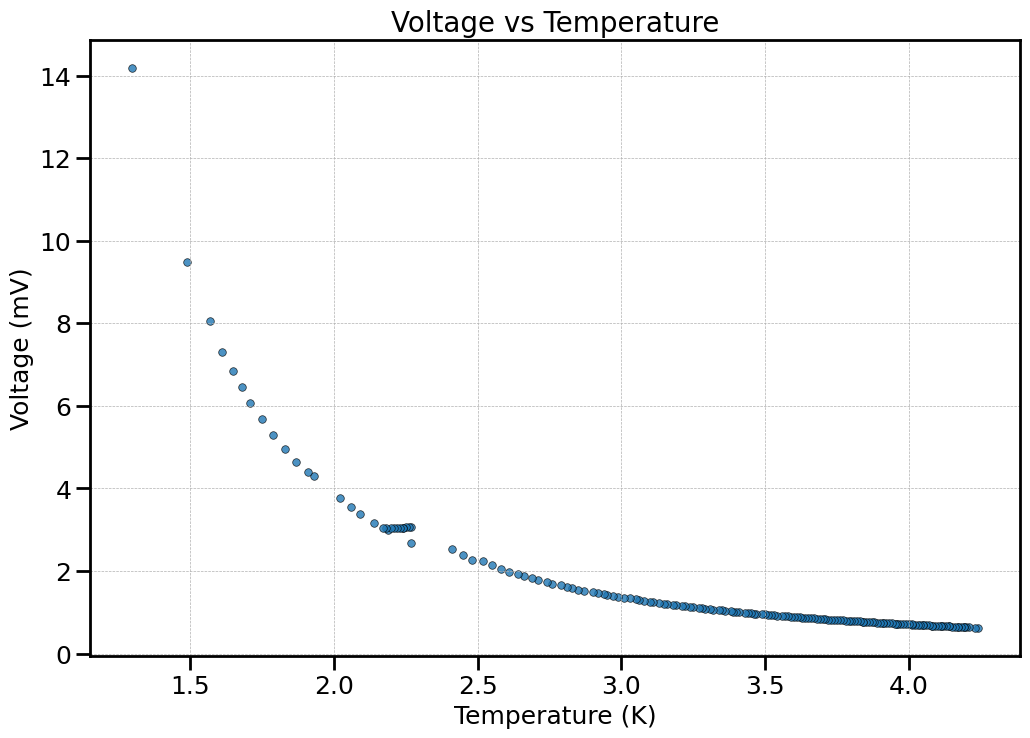

In [72]:

plt.figure(figsize=(12, 8))

# Create a scatter plot:
# - s controls the marker size
# - edgecolors and linewidths adjust the marker border
plt.scatter(temperature_scale, df['Voltage (mV)'], s=30, edgecolors='black', linewidths=0.5, alpha=0.8)

# Add axis labels and title
plt.xlabel('Temperature (K)')
plt.ylabel('Voltage (mV)')
plt.title('Voltage vs Temperature')

# # Adjust tick label size for better readability
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)

# Add a grid with custom style
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()
